In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import time
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, precision_recall_fscore_support, \
    confusion_matrix
import torch
import time
import numpy as np
from sklearn.model_selection import train_test_split

import re
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
def compute_metrics(pred,ground_labels):
    labels_all = ground_labels
    preds_all = list(pred)
    
    precision, recall, f1, _ = precision_recall_fscore_support(labels_all, preds_all)
    acc = accuracy_score(labels_all, preds_all)
    confusion_mat = confusion_matrix(labels_all, preds_all)
    # tn, fp, fn, tp = confusiton_mat.ravel()
    out_dict = {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall,
        'confusiton_mat': confusion_mat
    }
    return out_dict

In [7]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

def rfecv(X_train, X_val, y_train, y_val,key,resultsColumns,results):
  clf=RandomForestClassifier(n_estimators=100,max_features='auto',random_state=0,max_depth=14,class_weight='balanced')
  rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(),scoring='accuracy')
  rfecv.fit(X_train, y_train)

  print("Optimal number of features : %d" % rfecv.n_features_)

  plt.figure(figsize=(5,5))
  plt.xlabel("Number of features selected")
  plt.ylabel("Cross validation score (nb of correct classifications)")
  plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
  plt.show()

  print(X_train.columns.values[rfecv.support_])
  rfecv_features=list(X_train.columns.values[rfecv.support_])
  print(len(rfecv_features)," : " ,rfecv_features)

  predicted_y = rfecv.predict(X_val)
  gg=compute_metrics(predicted_y,y_val)
  d=gg
  tn, fp, fn, tp = d["confusiton_mat"].ravel()
  # tn, fp, fn, tp = 0,0,0,0
  print("{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}".format('prec-t','prec-f', 'rec-t','rec-f','f1-t','f1-f','accu','tn', 'fp', 'fn', 'tp'))  # correct
  print ("{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:}\t{:}\t{:}\t{:}".format(d['precision'][0],d['precision'][1], d['recall'][0],d['recall'][1],d['f1'][0],d['f1'][1],d['accuracy'],tn, fp, fn, tp))
  
  # dfrfecv=pd.DataFrame([[key,"rfecv",d['precision'][0],d['precision'][1], d['recall'][0],d['recall'][1],d['f1'][0],d['f1'][1],d['accuracy'],tn, fp, fn, tp]],columns=resultsColumns)
  dfrfecv=[key,"rfecv",d['precision'][0],d['precision'][1], d['recall'][0],d['recall'][1],d['f1'][0],d['f1'][1],d['accuracy'],tn, fp, fn, tp]
  results=results.append(dfrfecv)
  return(rfecv_features)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

classifiers=[
             ['Logistic Regression :',LogisticRegression()],
       ['Decision Tree Classification :',DecisionTreeClassifier()],
       ['Gradient Boosting Classification :', GradientBoostingClassifier()],
       ['Ada Boosting Classification :',AdaBoostClassifier()],
       ['Extra Tree Classification :', ExtraTreesClassifier()],
       ['K-Neighbors Classification :',KNeighborsClassifier()],
       ['Support Vector Classification :',SVC()],
       ['Gaussian Naive Bayes :',GaussianNB()]
      ]

# ~ 4-5 min run 
def compare_models( X_train, X_val, y_train, y_val,features,key):
  cla_pred=[]

  for name,model1 in classifiers:
      print("-----------"+name+"-------------")
      model1.fit(X_train[features],y_train)
      predicted_y = model1.predict(X_val[features])
      score=compute_metrics(predicted_y,y_val)
      cla_pred.append(score)

  #Prining the evaluation matrix to the console
  print("Summary\n Class 0- True news \n Class 1 - False news\n {:}".format(key))
  print("{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}".format('prec-t','prec-f', 'rec-t','rec-f','f1-t','f1-f','accu','tn', 'fp', 'fn', 'tp',"model"))  # correct
  for i in range(len(classifiers)):
    d=cla_pred[i]
    tn, fp, fn, tp = cla_pred[i]["confusiton_mat"].ravel() #correct
    print ("{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:}\t{:}\t{:}\t{:}\t{:}".format(d['precision'][0],d['precision'][1], d['recall'][0],d['recall'][1],d['f1'][0],d['f1'][1],d['accuracy'],tn, fp, fn, tp,classifiers[i][0]))

    dfCm=[key,classifiers[i][0],d['precision'][0],d['precision'][1], d['recall'][0],d['recall'][1],d['f1'][0],d['f1'][1],d['accuracy'],tn, fp, fn, tp]
    results.append(dfCm)

In [ ]:
resultsColumns=["data","model",'prec-t','prec-f', 'rec-t','rec-f','f1-t','f1-f','accu','tn', 'fp', 'fn', 'tp']
results=pd.DataFrame(columns=resultsColumns)
for i in range(len(cla_pred)):
    d=cla_pred[i]
    tn, fp, fn, tp = cla_pred[i]["confusiton_mat"].ravel() #correct
    print ("{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:}\t{:}\t{:}\t{:}\t{:}".format(d['precision'][0],d['precision'][1], d['recall'][0],d['recall'][1],d['f1'][0],d['f1'][1],d['accuracy'],tn, fp, fn, tp,classifiers[i%8][0]))

    dfCm=pd.DataFrame([[key,classifiers[i%8][0],d['precision'][0],d['precision'][1], d['recall'][0],d['recall'][1],d['f1'][0],d['f1'][1],d['accuracy'],tn, fp, fn, tp]],columns=resultsColumns)
    results=results.append(dfCm,ignore_index=True)

In [ ]:
# resultsPath={
#     "codalab":["/content/drive/Shareddrives/[FYP] Fake News Detection/Results/CodaLab Covid/CodaLab_lexicon.csv","/content/drive/Shareddrives/[FYP] Fake News Detection/Results/CodaLab Covid/CodaLab_sementic.csv","/content/drive/Shareddrives/[FYP] Fake News Detection/Results/CodaLab Covid/CovidCodeLab_predictions_emotions.csv"],
#     "fakenewsnet" :["/content/drive/Shareddrives/[FYP] Fake News Detection/Results/FakeNewsNet/FakeNewsNet_lexicon.csv","/content/drive/Shareddrives/[FYP] Fake News Detection/Results/FakeNewsNet/FakeNewsNet_sementic.csv","/content/drive/Shareddrives/[FYP] Fake News Detection/Results/FakeNewsNet/FakeNewsNet_predictions_emotions.csv"],
#     "isot":["/content/drive/Shareddrives/[FYP] Fake News Detection/Results/ISOT/ISOT_lexicon.csv","/content/drive/Shareddrives/[FYP] Fake News Detection/Results/ISOT/ISOT_sementic.csv","/content/drive/Shareddrives/[FYP] Fake News Detection/Results/ISOT/ISOT_predictions_emotions.csv"],
#     # "kaggle" :["","/content/drive/Shareddrives/[FYP] Fake News Detection/Results/Kaggle/Kaggle_sementic.csv","/content/drive/Shareddrives/[FYP] Fake News Detection/Results/Kaggle/Kaggle_predictions_emotions.csv"],
#     "kagglerealfake":["/content/drive/Shareddrives/[FYP] Fake News Detection/Results/Kaggle_real_fake/Kaggle_real_fake_lexicon.csv","/content/drive/Shareddrives/[FYP] Fake News Detection/Results/Kaggle_real_fake/Kaggle_real_fake_sementic.csv","/content/drive/Shareddrives/[FYP] Fake News Detection/Results/Kaggle_real_fake/Kaggle_real_fake_predictions_emotions.csv"],
#     "liar":["/content/drive/Shareddrives/[FYP] Fake News Detection/Results/LIAR/Liar_lexicon.csv","/content/drive/Shareddrives/[FYP] Fake News Detection/Results/LIAR/Liar_sementic.csv","/content/drive/Shareddrives/[FYP] Fake News Detection/Results/LIAR/LIAR_predictions_emotions.csv"],
#     # "politifact":["","/content/drive/Shareddrives/[FYP] Fake News Detection/Results/Politifact/Politifact_sementic.csv","/content/drive/Shareddrives/[FYP] Fake News Detection/Results/Politifact/Politifact_predictions_emotions.csv"],
#     # "welfake":["/content/drive/Shareddrives/[FYP] Fake News Detection/Results/Welfake/Welfake_lexicon.csv","/content/drive/Shareddrives/[FYP] Fake News Detection/Results/Welfake/Welfake_sementic.csv","/content/drive/Shareddrives/[FYP] Fake News Detection/Results/Welfake/WelFake_predictions_emotions.csv"]
# }

In [ ]:
df=pd.read_csv(resultsPath["welfake"][1])

In [ ]:
df.head()

,id,label,url_count,qn_symbol,num_chars,num_words,num_sentences,words_per_sentence,characters_per_word,punctuations_per_sentence,positive,negative,num_exclamation,get_sentiment_polarity,lexical_diversity,content_word_diversity_and_redundancy,nvaa,content_word_diversity,redundancy,noun,verb,adj,adv,lang
0,0,1,0,7,4979,870,44,19.772727,4.597701,4.136364,1.494253,3.908046,2,-0.9926,42.528736,"{'content_word_diversity': 31.494252873563216,...","{'NOUN': 12.873563218390805, 'VERB': 10.344827...",31.494253,13.218391,12.873563,10.344828,4.367816,3.218391,en
1,1,1,0,1,46,8,1,8.000000,4.750000,1.000000,0.000000,0.000000,0,0.0000,100.000000,"{'content_word_diversity': 37.5, 'redundancy':...","{'NOUN': 12.5, 'VERB': 12.5, 'ADJ': 0.0, 'ADV'...",37.500000,62.500000,12.500000,12.500000,0.000000,12.500000,en
2,2,1,0,0,212,34,2,17.000000,5.205882,1.000000,5.882353,5.882353,0,0.7351,91.176471,"{'content_word_diversity': 58.82352941176471, ...","{'NOUN': 20.588235294117645, 'VERB': 17.647058...",58.823529,32.352941,20.588235,17.647059,11.764706,5.882353,en
3,3,0,0,1,7922,1318,53,24.867925,4.906677,2.905660,2.655539,1.365706,0,0.9993,46.889226,"{'content_word_diversity': 38.23975720789075, ...","{'NOUN': 15.326251896813353, 'VERB': 10.622154...",38.239757,10.546282,15.326252,10.622155,4.855842,2.200303,en
4,4,1,0,0,1904,326,10,32.600000,4.760736,4.200000,1.840491,1.533742,0,-0.9081,53.374233,"{'content_word_diversity': 41.717791411042946,...","{'NOUN': 14.723926380368098, 'VERB': 8.2822085...",41.717791,13.496933,14.723926,8.282209,4.601227,1.533742,en


In [ ]:
df["label"]=df.cred_label.apply(str.lower)

In [ ]:
df.label.value_counts()

false             732
half-true         693
mostly true       642
mostly false      585
true              510
pants on fire!    367
Name: label, dtype: int64

In [9]:
def convert_label(label):
  if label in ['true', 'mostly-true', 'half-true', 'real', 'Real', 0, 'REAL']:
    return 0
  if label in ['false', 'pants-fire', 'barely-true', 'fake', 'Fake', 1, 'FAKE']:
    return 1

In [ ]:
df.label.value_counts()

0    1845
1    1684
Name: label, dtype: int64

In [ ]:
sementic_features= [
                    'url_count',
                    'qn_symbol',
                    'num_chars',
                    'num_words',
                    'num_sentences',
                    'words_per_sentence',
                    'characters_per_word',
                    'punctuations_per_sentence',
                    'num_exclamation',
                    'get_sentiment_polarity',
                    'lexical_diversity',
                    'content_word_diversity',
                    'redundancy',
                    'noun',
                    'verb',
                    'adj',
                    'adv',
                    "qn_symbol_per_sentence",
                    "num_exclamation_per_sentence",
                    "url_count_per_sentence"
                    ]

LangMod_Features=   [
                     'fake_score', 
                    'true_score', 
                    'common_score'
                    ]

Sentiment_features= [
                    #  'highest_eight_label', 
                    'anger', 
                    'anticipation',
                    'disgust', 
                    'fear',
                    'joy', 
                    'sadness', 
                    'surprise', 
                    'trust'
                    ]
All_features=sementic_features+LangMod_Features+Sentiment_features

In [ ]:
dfg.dropna(inplace=True)

In [ ]:
dfg.isnull().any(axis=1).sum()

0

In [ ]:
df.loc[df['fake_score']==np.inf]

In [ ]:
df.info()

In [ ]:
id={"codalab":"id", "fakenewsnet":"id", "isot":"id", "kaggle":"id","kagglerealfake":"id", "liar":"ID", "politifact":"claim_id", "welfake":"id"}
label={"codalab":"label", "fakenewsnet":"label", "isot":"label", "kaggle":"label","kagglerealfake":"label","liar":"label", "politifact":"cred_label", "welfake":"label"}
features=["lexicon","sementic","sentiment"]

resultsColumns=["data","model",'prec-t','prec-f', 'rec-t','rec-f','f1-t','f1-f','accu','tn', 'fp', 'fn', 'tp']
results=[]

for key,value in resultsPath.items():
  print("----------",key,"--------------")
  error=False
  ID=id[key]
  Label=label[key]
  for v in range(3):
    if value[v]=="":
      error=True
      print("   Error: missing {:} skipping {:}".format(features[v],key))
      break
  if (not error):
    dfLexicon  = pd.read_csv(value[0])
    dfSementic = pd.read_csv(value[1])
    dfSentiment = pd.read_csv(value[2])

    dff=dfSentiment.merge(dfSementic, how='inner', on=ID,suffixes=('_Sentiment', '_Sementic'))
    df=dff.merge(dfLexicon, how='inner', on=ID,suffixes=('', '_Lexicon'))
    df=df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1)

    df["qn_symbol_per_sentence"]=df["qn_symbol"]/df["num_sentences"]
    df["num_exclamation_per_sentence"]=df["num_exclamation"]/df["num_sentences"]
    df["url_count_per_sentence"]=df["url_count"]/df["num_sentences"]

    df=df.loc[df["lang"]=="en"]
    df["label"]=df[Label+"_Sementic"]

    print(df[Label].value_counts())
    # print(df.head())
    if (key=="politifact"):
      df["label"]=df["label"].replace(["true","mostly true","half-true"],0)
      df["label"]=df["label"].replace(["false","mostly false","pants on fire!"],1)

    if (key =="liar"):
      df["label"]=df["label"].replace(["true","mostly-true","half-true"],0)
      df["label"]=df["label"].replace(["false","barely-true","pants-fire"],1)
      
    if (key=="codalab" or key=="liar"):  
      df=df[All_features+["label",ID,"split_Sementic"]]

      print("null rows : ",df.isnull().any(axis=1).sum())
      df.replace([np.inf, -np.inf], np.nan, inplace=True)
      print("inf rows : ",df.isnull().any(axis=1).sum())
      df.dropna(inplace=True)

      df_train = df.loc[df["split_Sementic"]=="train"][All_features+['label']]
      df_test = df.loc[df["split_Sementic"]!="train"][All_features+['label']]  

      X_train=df_train[All_features]
      y_train=df_train["label"]
      X_val=df_test[All_features]
      y_val=df_test["label"]
    else:
      df=df[All_features+["label",ID,]]

      print("null rows : ",df.isnull().any(axis=1).sum())
      df.replace([np.inf, -np.inf], np.nan, inplace=True)
      print("inf rows : ",df.isnull().any(axis=1).sum())
      df.dropna(inplace=True)

      X_train, X_val, y_train, y_val = train_test_split(df[All_features], df["label"], test_size=0.3, random_state=142,stratify=df["label"])
    

    # print("   getting optimal Features :rfecv")
    # rfec_features=rfecv(X_train, X_val, y_train, y_val,key,resultsColumns,results)

    print("   comparing differnet models")
    compare_models( X_train, X_val, y_train, y_val ,All_features,key)
    print("=============================================================================")
    print("=============================================================================")
    

---------- codalab --------------
real    5583
fake    5037
Name: label, dtype: int64
null rows :  0
inf rows :  0
   comparing differnet models
-----------Logistic Regression :-------------


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


-----------Decision Tree Classification :-------------
-----------Gradient Boosting Classification :-------------
-----------Ada Boosting Classification :-------------
-----------Extra Tree Classification :-------------
-----------K-Neighbors Classification :-------------
-----------Support Vector Classification :-------------
-----------Gaussian Naive Bayes :-------------
Summary
 Class 0- True news 
 Class 1 - False news
 codalab
prec-t	prec-f	rec-t	rec-f	f1-t	f1-f	accu	tn	fp	fn	tp	model
0.725	0.708	0.645	0.779	0.682	0.742	0.715	1300	716	494	1740	Logistic Regression :
0.770	0.803	0.786	0.788	0.778	0.795	0.787	1585	431	474	1760	Decision Tree Classification :
0.869	0.837	0.808	0.890	0.837	0.862	0.851	1628	388	246	1988	Gradient Boosting Classification :
0.813	0.831	0.813	0.831	0.813	0.831	0.823	1639	377	377	1857	Ada Boosting Classification :
0.891	0.845	0.815	0.910	0.852	0.877	0.865	1643	373	200	2034	Extra Tree Classification :
0.703	0.731	0.701	0.733	0.702	0.732	0.718	1414	602	596	1638

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


-----------Decision Tree Classification :-------------
-----------Gradient Boosting Classification :-------------
-----------Ada Boosting Classification :-------------
-----------Extra Tree Classification :-------------
-----------K-Neighbors Classification :-------------
-----------Support Vector Classification :-------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-----------Gaussian Naive Bayes :-------------
Summary
 Class 0- True news 
 Class 1 - False news
 fakenewsnet
prec-t	prec-f	rec-t	rec-f	f1-t	f1-f	accu	tn	fp	fn	tp	model
0.000	0.761	0.000	1.000	0.000	0.864	0.760	0	1465	1	4655	Logistic Regression :
0.324	0.790	0.347	0.772	0.336	0.781	0.671	509	956	1060	3596	Decision Tree Classification :
0.647	0.775	0.091	0.984	0.160	0.867	0.771	134	1331	73	4583	Gradient Boosting Classification :
0.631	0.774	0.084	0.985	0.148	0.866	0.769	123	1342	72	4584	Ada Boosting Classification :
0.650	0.779	0.115	0.980	0.196	0.868	0.773	169	1296	91	4565	Extra Tree Classification :
0.276	0.765	0.120	0.901	0.167	0.827	0.714	176	1289	461	4195	K-Neighbors Classification :
0.000	0.761	0.000	1.000	0.000	0.864	0.761	0	1465	0	4656	Support Vector Classification :
0.378	0.788	0.258	0.866	0.307	0.825	0.721	378	1087	623	4033	Gaussian Naive Bayes :
---------- isot --------------
0    75946
1    66415
Name: label, dtype: int64
null rows :  0
inf rows :  0
   comparing differnet 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


-----------Decision Tree Classification :-------------
-----------Gradient Boosting Classification :-------------
-----------Ada Boosting Classification :-------------
-----------Extra Tree Classification :-------------
-----------K-Neighbors Classification :-------------
-----------Support Vector Classification :-------------
-----------Gaussian Naive Bayes :-------------
Summary
 Class 0- True news 
 Class 1 - False news
 isot
prec-t	prec-f	rec-t	rec-f	f1-t	f1-f	accu	tn	fp	fn	tp	model
0.870	0.873	0.892	0.848	0.881	0.860	0.871	20321	2461	3033	16892	Logistic Regression :
0.985	0.981	0.983	0.983	0.984	0.982	0.983	22396	386	335	19590	Decision Tree Classification :
0.921	0.932	0.942	0.908	0.932	0.920	0.926	21464	1318	1832	18093	Gradient Boosting Classification :
0.910	0.917	0.929	0.895	0.920	0.906	0.913	21164	1618	2084	17841	Ada Boosting Classification :
0.992	0.996	0.996	0.990	0.994	0.993	0.993	22695	87	194	19731	Extra Tree Classification :
0.861	0.901	0.920	0.830	0.890	0.864	0.878	20960

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


-----------Gradient Boosting Classification :-------------
-----------Ada Boosting Classification :-------------
-----------Extra Tree Classification :-------------
-----------K-Neighbors Classification :-------------
-----------Support Vector Classification :-------------
-----------Gaussian Naive Bayes :-------------
Summary
 Class 0- True news 
 Class 1 - False news
 kagglerealfake
prec-t	prec-f	rec-t	rec-f	f1-t	f1-f	accu	tn	fp	fn	tp	model
0.701	0.657	0.630	0.725	0.664	0.689	0.677	580	340	247	650	Logistic Regression :
0.701	0.678	0.674	0.706	0.687	0.692	0.690	620	300	264	633	Decision Tree Classification :
0.786	0.754	0.748	0.792	0.767	0.772	0.769	688	232	187	710	Gradient Boosting Classification :
0.765	0.727	0.717	0.774	0.740	0.750	0.745	660	260	203	694	Ada Boosting Classification :
0.766	0.742	0.739	0.768	0.752	0.755	0.753	680	240	208	689	Extra Tree Classification :
0.628	0.596	0.565	0.657	0.595	0.625	0.610	520	400	308	589	K-Neighbors Classification :
0.667	0.615	0.567	0.709	0.613	

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


-----------Decision Tree Classification :-------------
-----------Gradient Boosting Classification :-------------
-----------Ada Boosting Classification :-------------
-----------Extra Tree Classification :-------------
-----------K-Neighbors Classification :-------------
-----------Support Vector Classification :-------------
-----------Gaussian Naive Bayes :-------------
Summary
 Class 0- True news 
 Class 1 - False news
 liar
prec-t	prec-f	rec-t	rec-f	f1-t	f1-f	accu	tn	fp	fn	tp	model
0.562	0.561	0.875	0.190	0.684	0.284	0.562	1204	172	938	220	Logistic Regression :
0.546	0.460	0.561	0.445	0.553	0.452	0.508	772	604	643	515	Decision Tree Classification :
0.569	0.536	0.792	0.286	0.662	0.373	0.561	1090	286	827	331	Gradient Boosting Classification :
0.574	0.536	0.762	0.327	0.654	0.406	0.563	1048	328	779	379	Ada Boosting Classification :
0.577	0.555	0.789	0.313	0.666	0.401	0.571	1085	291	795	363	Extra Tree Classification :
0.560	0.483	0.627	0.414	0.592	0.446	0.530	863	513	679	479	K-Neighbor

In [ ]:
id={"codalab":"id", "fakenewsnet":"id", "isot":"id", "kaggle":"id","kagglerealfake":"id", "liar":"ID", "politifact":"claim_id", "welfake":"id"}
label={"codalab":"label", "fakenewsnet":"label", "isot":"label", "kaggle":"label","kagglerealfake":"label","liar":"label", "politifact":"cred_label", "welfake":"label"}
features=["lexicon","sementic","sentiment"]

resultsColumns=["data","model",'prec-t','prec-f', 'rec-t','rec-f','f1-t','f1-f','accu','tn', 'fp', 'fn', 'tp']
results=pd.DataFrame(columns=resultsColumns)

for key,value in resultsPath.items():
  print("----------",key,"--------------")
  error=False
  ID=id[key]
  Label=label[key]
  for v in range(3):
    if value[v]=="":
      error=True
      print("   Error: missing {:} skipping {:}".format(features[v],key))
      break
  if (not error):
    dfLexicon  = pd.read_csv(value[0])
    dfSementic = pd.read_csv(value[1])
    dfSentiment = pd.read_csv(value[2])

    dff=dfSentiment.merge(dfSementic, how='inner', on=ID,suffixes=('_Sentiment', '_Sementic'))
    df=dff.merge(dfLexicon, how='inner', on=ID,suffixes=('', '_Lexicon'))
    df=df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1)

    df["qn_symbol_per_sentence"]=df["qn_symbol"]/df["num_sentences"]
    df["num_exclamation_per_sentence"]=df["num_exclamation"]/df["num_sentences"]
    df["url_count_per_sentence"]=df["url_count"]/df["num_sentences"]

    df=df.loc[df["lang"]=="en"]
    df["label"]=df[Label+"_Sementic"]

    print(df[Label].value_counts())
    # print(df.head())
    if (key=="politifact"):
      df["label"]=df["label"].replace(["true","mostly true","half-true"],0)
      df["label"]=df["label"].replace(["false","mostly false","pants on fire!"],1)

    if (key =="liar"):
      df["label"]=df["label"].replace(["true","mostly-true","half-true"],0)
      df["label"]=df["label"].replace(["false","barely-true","pants-fire"],1)
      
    if (key=="codalab" or key=="liar"):  
      df=df[All_features+["label",ID,"split_Sementic"]]

      print("null rows : ",df.isnull().any(axis=1).sum())
      df.replace([np.inf, -np.inf], np.nan, inplace=True)
      print("inf rows : ",df.isnull().any(axis=1).sum())
      df.dropna(inplace=True)

      df_train = df.loc[df["split_Sementic"]=="train"][All_features+['label']]
      df_test = df.loc[df["split_Sementic"]!="train"][All_features+['label']]  

      X_train=df_train[All_features]
      y_train=df_train["label"]
      X_val=df_test[All_features]
      y_val=df_test["label"]
    else:
      df=df[All_features+["label",ID,]]

      print("null rows : ",df.isnull().any(axis=1).sum())
      df.replace([np.inf, -np.inf], np.nan, inplace=True)
      print("inf rows : ",df.isnull().any(axis=1).sum())
      df.dropna(inplace=True)

      X_train, X_val, y_train, y_val = train_test_split(df[All_features], df["label"], test_size=0.3, random_state=142,stratify=df["label"])
  
    resultsColumns=["data","model",'prec-t','prec-f', 'rec-t','rec-f','f1-t','f1-f','accu','tn', 'fp', 'fn', 'tp']
    
    print("   getting optimal Features :rfecv")
    rfec_features=rfecv(X_train, X_val, y_train, y_val,key)

    print("   comparing differnet models")
    compare_models( X_train, X_val, y_train, y_val ,rfec_features,key,resultsColumns)
    print("=============================================================================")
    print("=============================================================================")

---------- codalab --------------
real    5583
fake    5037
Name: label, dtype: int64
null rows :  0
inf rows :  0
   getting optimal Features :rfecv
Optimal number of features : 31


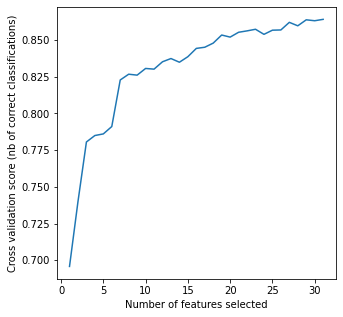

['url_count' 'qn_symbol' 'num_chars' 'num_words' 'num_sentences'
 'words_per_sentence' 'characters_per_word' 'punctuations_per_sentence'
 'num_exclamation' 'get_sentiment_polarity' 'lexical_diversity'
 'content_word_diversity' 'redundancy' 'noun' 'verb' 'adj' 'adv'
 'qn_symbol_per_sentence' 'num_exclamation_per_sentence'
 'url_count_per_sentence' 'fake_score' 'true_score' 'common_score' 'anger'
 'anticipation' 'disgust' 'fear' 'joy' 'sadness' 'surprise' 'trust']
31  :  ['url_count', 'qn_symbol', 'num_chars', 'num_words', 'num_sentences', 'words_per_sentence', 'characters_per_word', 'punctuations_per_sentence', 'num_exclamation', 'get_sentiment_polarity', 'lexical_diversity', 'content_word_diversity', 'redundancy', 'noun', 'verb', 'adj', 'adv', 'qn_symbol_per_sentence', 'num_exclamation_per_sentence', 'url_count_per_sentence', 'fake_score', 'true_score', 'common_score', 'anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']
prec-t	prec-f	rec-t	rec-f	f1-t	f1-f

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


-----------Decision Tree Classification :-------------
-----------Gradient Boosting Classification :-------------
-----------Ada Boosting Classification :-------------
-----------Extra Tree Classification :-------------
-----------K-Neighbors Classification :-------------
-----------Support Vector Classification :-------------
-----------Gaussian Naive Bayes :-------------
Summary
 Class 0- True news 
 Class 1 - False news
 codalab
prec-t	prec-f	rec-t	rec-f	f1-t	f1-f	accu	tn	fp	fn	tp	model
0.725	0.708	0.645	0.779	0.682	0.742	0.715	1300	716	494	1740	Logistic Regression :
0.771	0.807	0.791	0.788	0.781	0.797	0.789	1594	422	473	1761	Decision Tree Classification :
0.869	0.837	0.808	0.890	0.837	0.862	0.851	1628	388	246	1988	Gradient Boosting Classification :
0.813	0.831	0.813	0.831	0.813	0.831	0.823	1639	377	377	1857	Ada Boosting Classification :
0.890	0.847	0.817	0.909	0.852	0.877	0.865	1648	368	204	2030	Extra Tree Classification :
0.703	0.731	0.701	0.733	0.702	0.732	0.718	1414	602	596	1638

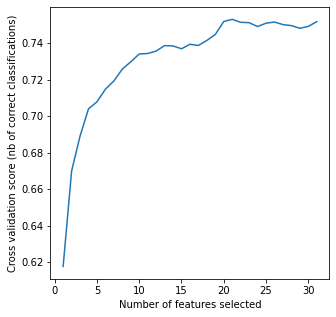

['num_chars' 'words_per_sentence' 'characters_per_word'
 'punctuations_per_sentence' 'get_sentiment_polarity'
 'content_word_diversity' 'redundancy' 'noun' 'verb'
 'qn_symbol_per_sentence' 'fake_score' 'true_score' 'common_score' 'anger'
 'anticipation' 'disgust' 'fear' 'joy' 'sadness' 'surprise' 'trust']
21  :  ['num_chars', 'words_per_sentence', 'characters_per_word', 'punctuations_per_sentence', 'get_sentiment_polarity', 'content_word_diversity', 'redundancy', 'noun', 'verb', 'qn_symbol_per_sentence', 'fake_score', 'true_score', 'common_score', 'anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']
prec-t	prec-f	rec-t	rec-f	f1-t	f1-f	accu	tn	fp	fn	tp
0.471	0.798	0.273	0.903	0.346	0.847	0.752	400	1065	450	4206
   comparing differnet models
-----------Logistic Regression :-------------


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


-----------Decision Tree Classification :-------------
-----------Gradient Boosting Classification :-------------
-----------Ada Boosting Classification :-------------
-----------Extra Tree Classification :-------------
-----------K-Neighbors Classification :-------------
-----------Support Vector Classification :-------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-----------Gaussian Naive Bayes :-------------
Summary
 Class 0- True news 
 Class 1 - False news
 fakenewsnet
prec-t	prec-f	rec-t	rec-f	f1-t	f1-f	accu	tn	fp	fn	tp	model
0.725	0.708	0.645	0.779	0.682	0.742	0.715	1300	716	494	1740	Logistic Regression :
0.771	0.807	0.791	0.788	0.781	0.797	0.789	1594	422	473	1761	Decision Tree Classification :
0.869	0.837	0.808	0.890	0.837	0.862	0.851	1628	388	246	1988	Gradient Boosting Classification :
0.813	0.831	0.813	0.831	0.813	0.831	0.823	1639	377	377	1857	Ada Boosting Classification :
0.890	0.847	0.817	0.909	0.852	0.877	0.865	1648	368	204	2030	Extra Tree Classification :
0.703	0.731	0.701	0.733	0.702	0.732	0.718	1414	602	596	1638	K-Neighbors Classification :
0.747	0.694	0.601	0.816	0.666	0.750	0.714	1211	805	411	1823	Support Vector Classification :
0.799	0.641	0.442	0.900	0.570	0.749	0.683	892	1124	224	2010	Gaussian Naive Bayes :
---------- isot --------------
0    75946
1    66415
Name: label, dtype: int64
null rows :  0
inf rows :  0
   getting o

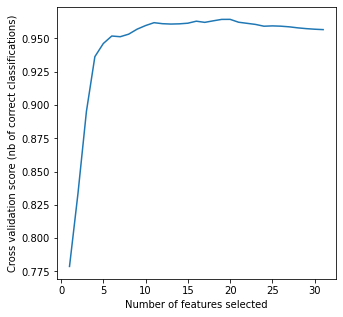

['url_count' 'qn_symbol' 'num_chars' 'num_words' 'num_sentences'
 'words_per_sentence' 'characters_per_word' 'punctuations_per_sentence'
 'num_exclamation' 'get_sentiment_polarity' 'lexical_diversity'
 'content_word_diversity' 'redundancy' 'noun' 'verb' 'adj' 'adv'
 'qn_symbol_per_sentence' 'num_exclamation_per_sentence'
 'url_count_per_sentence']
20  :  ['url_count', 'qn_symbol', 'num_chars', 'num_words', 'num_sentences', 'words_per_sentence', 'characters_per_word', 'punctuations_per_sentence', 'num_exclamation', 'get_sentiment_polarity', 'lexical_diversity', 'content_word_diversity', 'redundancy', 'noun', 'verb', 'adj', 'adv', 'qn_symbol_per_sentence', 'num_exclamation_per_sentence', 'url_count_per_sentence']
prec-t	prec-f	rec-t	rec-f	f1-t	f1-f	accu	tn	fp	fn	tp
0.954	0.981	0.984	0.946	0.969	0.963	0.966	22408	374	1073	18852
   comparing differnet models
-----------Logistic Regression :-------------


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


-----------Decision Tree Classification :-------------
-----------Gradient Boosting Classification :-------------
-----------Ada Boosting Classification :-------------
-----------Extra Tree Classification :-------------
-----------K-Neighbors Classification :-------------
-----------Support Vector Classification :-------------
-----------Gaussian Naive Bayes :-------------
Summary
 Class 0- True news 
 Class 1 - False news
 isot
prec-t	prec-f	rec-t	rec-f	f1-t	f1-f	accu	tn	fp	fn	tp	model
0.725	0.708	0.645	0.779	0.682	0.742	0.715	1300	716	494	1740	Logistic Regression :
0.771	0.807	0.791	0.788	0.781	0.797	0.789	1594	422	473	1761	Decision Tree Classification :
0.869	0.837	0.808	0.890	0.837	0.862	0.851	1628	388	246	1988	Gradient Boosting Classification :
0.813	0.831	0.813	0.831	0.813	0.831	0.823	1639	377	377	1857	Ada Boosting Classification :
0.890	0.847	0.817	0.909	0.852	0.877	0.865	1648	368	204	2030	Extra Tree Classification :
0.703	0.731	0.701	0.733	0.702	0.732	0.718	1414	602	596	1638	K-

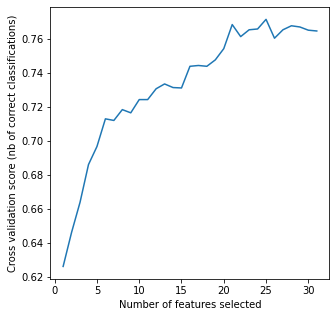

['num_chars' 'num_words' 'num_sentences' 'words_per_sentence'
 'characters_per_word' 'punctuations_per_sentence'
 'get_sentiment_polarity' 'lexical_diversity' 'content_word_diversity'
 'redundancy' 'noun' 'verb' 'adj' 'adv' 'qn_symbol_per_sentence'
 'num_exclamation_per_sentence' 'url_count_per_sentence' 'fake_score'
 'true_score' 'common_score' 'anger' 'anticipation' 'fear' 'joy' 'trust']
25  :  ['num_chars', 'num_words', 'num_sentences', 'words_per_sentence', 'characters_per_word', 'punctuations_per_sentence', 'get_sentiment_polarity', 'lexical_diversity', 'content_word_diversity', 'redundancy', 'noun', 'verb', 'adj', 'adv', 'qn_symbol_per_sentence', 'num_exclamation_per_sentence', 'url_count_per_sentence', 'fake_score', 'true_score', 'common_score', 'anger', 'anticipation', 'fear', 'joy', 'trust']
prec-t	prec-f	rec-t	rec-f	f1-t	f1-f	accu	tn	fp	fn	tp
0.785	0.746	0.736	0.794	0.760	0.769	0.764	677	243	185	712
   comparing differnet models
-----------Logistic Regression :-------------
-

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


-----------Gradient Boosting Classification :-------------
-----------Ada Boosting Classification :-------------
-----------Extra Tree Classification :-------------
-----------K-Neighbors Classification :-------------
-----------Support Vector Classification :-------------
-----------Gaussian Naive Bayes :-------------
Summary
 Class 0- True news 
 Class 1 - False news
 kagglerealfake
prec-t	prec-f	rec-t	rec-f	f1-t	f1-f	accu	tn	fp	fn	tp	model
0.725	0.708	0.645	0.779	0.682	0.742	0.715	1300	716	494	1740	Logistic Regression :
0.771	0.807	0.791	0.788	0.781	0.797	0.789	1594	422	473	1761	Decision Tree Classification :
0.869	0.837	0.808	0.890	0.837	0.862	0.851	1628	388	246	1988	Gradient Boosting Classification :
0.813	0.831	0.813	0.831	0.813	0.831	0.823	1639	377	377	1857	Ada Boosting Classification :
0.890	0.847	0.817	0.909	0.852	0.877	0.865	1648	368	204	2030	Extra Tree Classification :
0.703	0.731	0.701	0.733	0.702	0.732	0.718	1414	602	596	1638	K-Neighbors Classification :
0.747	0.694	0.601	

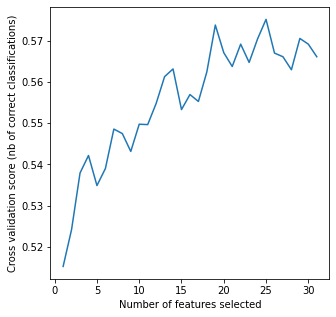

['num_chars' 'num_words' 'num_sentences' 'words_per_sentence'
 'characters_per_word' 'punctuations_per_sentence'
 'get_sentiment_polarity' 'lexical_diversity' 'content_word_diversity'
 'redundancy' 'noun' 'verb' 'adj' 'adv' 'fake_score' 'true_score'
 'common_score' 'anger' 'anticipation' 'disgust' 'fear' 'joy' 'sadness'
 'surprise' 'trust']
25  :  ['num_chars', 'num_words', 'num_sentences', 'words_per_sentence', 'characters_per_word', 'punctuations_per_sentence', 'get_sentiment_polarity', 'lexical_diversity', 'content_word_diversity', 'redundancy', 'noun', 'verb', 'adj', 'adv', 'fake_score', 'true_score', 'common_score', 'anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']
prec-t	prec-f	rec-t	rec-f	f1-t	f1-f	accu	tn	fp	fn	tp
0.579	0.516	0.662	0.427	0.618	0.467	0.555	911	465	663	495
   comparing differnet models
-----------Logistic Regression :-------------


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


-----------Decision Tree Classification :-------------
-----------Gradient Boosting Classification :-------------
-----------Ada Boosting Classification :-------------
-----------Extra Tree Classification :-------------
-----------K-Neighbors Classification :-------------
-----------Support Vector Classification :-------------
-----------Gaussian Naive Bayes :-------------
Summary
 Class 0- True news 
 Class 1 - False news
 liar
prec-t	prec-f	rec-t	rec-f	f1-t	f1-f	accu	tn	fp	fn	tp	model
0.725	0.708	0.645	0.779	0.682	0.742	0.715	1300	716	494	1740	Logistic Regression :
0.771	0.807	0.791	0.788	0.781	0.797	0.789	1594	422	473	1761	Decision Tree Classification :
0.869	0.837	0.808	0.890	0.837	0.862	0.851	1628	388	246	1988	Gradient Boosting Classification :
0.813	0.831	0.813	0.831	0.813	0.831	0.823	1639	377	377	1857	Ada Boosting Classification :
0.890	0.847	0.817	0.909	0.852	0.877	0.865	1648	368	204	2030	Extra Tree Classification :
0.703	0.731	0.701	0.733	0.702	0.732	0.718	1414	602	596	1638	K-

In [ ]:
id={"codalab":"id", "fakenewsnet":"id", "isot":"id", "kaggle":"id","kagglerealfake":"id", "liar":"ID", "politifact":"claim_id", "welfake":"id"}
label={"codalab":"label", "fakenewsnet":"label", "isot":"label", "kaggle":"label","kagglerealfake":"label","liar":"label", "politifact":"cred_label", "welfake":"label"}
features=["lexicon","sementic","sentiment"]

resultsColumns=["data","model",'prec-t','prec-f', 'rec-t','rec-f','f1-t','f1-f','accu','tn', 'fp', 'fn', 'tp']
results=pd.DataFrame(columns=resultsColumns)

for key,value in resultsPath.items():
  print("----------",key,"--------------")
  error=False
  ID=id[key]
  Label=label[key]
  for v in range(3):
    if value[v]=="":
      error=True
      print("   Error: missing {:} skipping {:}".format(features[v],key))
      break
  if (not error):
    dfLexicon  = pd.read_csv(value[0])
    dfSementic = pd.read_csv(value[1])
    dfSentiment = pd.read_csv(value[2])

    dff=dfSentiment.merge(dfSementic, how='inner', on=ID,suffixes=('_Sentiment', '_Sementic'))
    df=dff.merge(dfLexicon, how='inner', on=ID,suffixes=('', '_Lexicon'))
    df=df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1)

    df["qn_symbol_per_sentence"]=df["qn_symbol"]/df["num_sentences"]
    df["num_exclamation_per_sentence"]=df["num_exclamation"]/df["num_sentences"]
    df["url_count_per_sentence"]=df["url_count"]/df["num_sentences"]

    df=df.loc[df["lang"]=="en"]
    df["label"]=df[Label+"_Sementic"]

    print(df[Label].value_counts())
    # print(df.head())
    if (key=="politifact"):
      df["label"]=df["label"].replace(["true","mostly true","half-true"],0)
      df["label"]=df["label"].replace(["false","mostly false","pants on fire!"],1)

    if (key =="liar"):
      df["label"]=df["label"].replace(["true","mostly-true","half-true"],0)
      df["label"]=df["label"].replace(["false","barely-true","pants-fire"],1)
      
    if (key=="codalab" or key=="liar"):  
      df=df[All_features+["label",ID,"split_Sementic"]]

      print("null rows : ",df.isnull().any(axis=1).sum())
      df.replace([np.inf, -np.inf], np.nan, inplace=True)
      print("inf rows : ",df.isnull().any(axis=1).sum())
      df.dropna(inplace=True)

      df_train = df.loc[df["split_Sementic"]=="train"][All_features+['label']]
      df_test = df.loc[df["split_Sementic"]!="train"][All_features+['label']]  

      X_train=df_train[All_features]
      y_train=df_train["label"]
      X_val=df_test[All_features]
      y_val=df_test["label"]
    else:
      df=df[All_features+["label",ID,]]

      print("null rows : ",df.isnull().any(axis=1).sum())
      df.replace([np.inf, -np.inf], np.nan, inplace=True)
      print("inf rows : ",df.isnull().any(axis=1).sum())
      df.dropna(inplace=True)

      X_train, X_val, y_train, y_val = train_test_split(df[All_features], df["label"], test_size=0.3, random_state=142,stratify=df["label"])
    

    print("   getting optimal Features :rfecv")
    rfec_features=rfecv(X_train, X_val, y_train, y_val,key,resultsColumns,results)

    print("   comparing differnet models")
    compare_models( X_train, X_val, y_train, y_val ,rfec_features,key,resultsColumns,results)
    print("=============================================================================")
    print("=============================================================================")
    

In [ ]:
results.head()

,data,model,prec-t,prec-f,rec-t,rec-f,f1-t,f1-f,accu,tn,fp,fn,tp


In [ ]:
results.to_csv("/content/drive/Shareddrives/[FYP] Fake News Detection/Results/Oct10FullRfecv.csv",index=False)

# Rapids

https://medium.com/@kayush206/rapids-on-google-colab-d11df50abcf3

In [ ]:
!nvidia-smi # need Tesla T4

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
!nvcc -V #>=9.2

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [ ]:
!python -V; pip -V  #3.6

Python 3.7.12
pip 21.1.3 from /usr/local/lib/python3.7/dist-packages/pip (python 3.7)


In [ ]:
# installing cuml dependencies
!apt install libopenblas-base libomp-dev 
# installing the cuml 
!pip install cuml-cuda100

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libopenblas-base is already the newest version (0.2.20+ds-4).
libopenblas-base set to manually installed.
Suggested packages:
  libomp-doc
The following NEW packages will be installed:
  libomp-dev libomp5
0 upgraded, 2 newly installed, 0 to remove and 37 not upgraded.
Need to get 239 kB of archives.
After this operation, 804 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libomp5 amd64 5.0.1-1 [234 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libomp-dev amd64 5.0.1-1 [5,088 B]
Fetched 239 kB in 0s (2,576 kB/s)
Selecting previously unselected package libomp5:amd64.
(Reading database ... 155219 files and directories currently installed.)
Preparing to unpack .../libomp5_5.0.1-1_amd64.deb ...
Unpacking libomp5:amd64 (5.0.1-1) ...
Selecting previously unselected package libomp-dev.
Preparing to unpack .../libomp-dev_5.0.1

If you try to import cudf at this point, it will give you, librmm.so not found error.
- copy this librmm.so to your current working directory:

In [ ]:
!cp /usr/local/lib/python3.6/dist-packages/libcuml.so /usr/lib64-nvidia/

cp: cannot stat '/usr/local/lib/python3.6/dist-packages/libcuml.so': No such file or directory


Step 3: Here you have to set the path for NVVM. copy and paste the below lines to notebook cell.

In [ ]:
import os  
os.environ['NUMBAPRO_NVVM']='/usr/local/cuda-10.0/nvvm/lib64/libnvvm.so'  
os.environ['NUMBAPRO_LIBDEVICE']='/usr/local/cuda-10.0/nvvm/libdevice'

# GSOM

In [ ]:
https://github.com/VivekVinushanth/GSOM_Classifier/blob/master/util/utilities.py

In [ ]:
import time
import sys
import os
import re
from os.path import join
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
# sys.path.append('../../')

# import data_parser as Parser
from util import utilities as Utils
from util import display as Display_Utils
from core4 import gsom as GSOM_Core

from params import params as Params

ModuleNotFoundError: ignored